 **knock60**

In [8]:
from google.colab import drive
drive.mount('/content/drive')
from gensim.models import KeyedVectors


file = '/content/drive/MyDrive/chapter07/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(file, binary = True)
model['United_States']


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


array([-3.61328125e-02, -4.83398438e-02,  2.35351562e-01,  1.74804688e-01,
       -1.46484375e-01, -7.42187500e-02, -1.01562500e-01, -7.71484375e-02,
        1.09375000e-01, -5.71289062e-02, -1.48437500e-01, -6.00585938e-02,
        1.74804688e-01, -7.71484375e-02,  2.58789062e-02, -7.66601562e-02,
       -3.80859375e-02,  1.35742188e-01,  3.75976562e-02, -4.19921875e-02,
       -3.56445312e-02,  5.34667969e-02,  3.68118286e-04, -1.66992188e-01,
       -1.17187500e-01,  1.41601562e-01, -1.69921875e-01, -6.49414062e-02,
       -1.66992188e-01,  1.00585938e-01,  1.15722656e-01, -2.18750000e-01,
       -9.86328125e-02, -2.56347656e-02,  1.23046875e-01, -3.54003906e-02,
       -1.58203125e-01, -1.60156250e-01,  2.94189453e-02,  8.15429688e-02,
        6.88476562e-02,  1.87500000e-01,  6.49414062e-02,  1.15234375e-01,
       -2.27050781e-02,  3.32031250e-01, -3.27148438e-02,  1.77734375e-01,
       -2.08007812e-01,  4.54101562e-02, -1.23901367e-02,  1.19628906e-01,
        7.44628906e-03, -

**knock61**

In [9]:
model.similarity('United_States', 'U.S.')
#0.73107743

0.73107743

**knock62**

In [10]:
model.most_similar('United_States', topn = 10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

**knock63**

In [11]:
model.most_similar(positive=['Spain', 'Athens'], negative=['Madrid'], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

**knock64**

In [ ]:
from warnings import simplefilter
file2 = '/content/drive/MyDrive/chapter07/questions-words.txt'
file3 = '/content/drive/MyDrive/chapter07/questions-words-add.txt'

with open(file2, 'r') as f2, open(file3, 'w') as f3:
  for line in f2:  
    line = line.split()
    if line[0] == ':':
      category = line[1]
    else:
      word, cos = model.most_similar(positive=[line[1], line[2]], negative=[line[0]], topn=1)[0] #最も類似度の高い単語とその類似度
      f3.write(' '.join([category] + line + [word, str(cos) + '\n'])) #カテゴリ、元の行の要素、類似単語、類似度をスペース


**knock65**

In [13]:
import pandas as pd

with open('/content/drive/MyDrive/chapter07/questions-words-add.txt', 'r') as f3:
 df = pd.read_csv(f3, sep=" ", header=None)
sem = df[~df[0].str.contains("gram")] #意味的 ~:条件に一致しない行
syn = df[df[0].str.contains("gram")] #文法的

print("意味的アナロジー正解率：", (sem[4] == sem[5]).sum() / len(sem)) #一致するかどうか
print("文法的アナロジー正解率：", (syn[4] == syn[5]).sum() / len(syn)) 

意味的アナロジー正解率： 0.7210306406685236
文法的アナロジー正解率： nan


<ipython-input-13-396eb8a50280>:9: RuntimeWarning: invalid value encountered in long_scalars
  print("文法的アナロジー正解率：", (syn[4] == syn[5]).sum() / len(syn))


**knock66**

In [14]:
from scipy.stats import spearmanr
file4 = '/content/drive/MyDrive/chapter07/wordsim353/combined.csv'

human = []
sim = []
with open(file4, 'r') as f:
  next(f) #最初の行をスキップ
  for line in f:
    cols = line.rstrip().split(',')
    human.append(float(cols[2])) #ヒューマン評価のスコア
    sim.append(model.similarity(cols[0], cols[1])) #類似度

correlation, pvalue = spearmanr(human, sim) #相関係数
correlation
#0.7000166486272194

0.7000166486272194

**knock67**

In [16]:
import numpy as np
from sklearn.cluster import KMeans

#国名
countries = set()
with open('/content/drive/MyDrive/chapter07/questions-words-add.txt', 'r') as f3:
  for line in f3:
    line = line.split()
    if line[0] in ['capital-common-countries', 'capital-world']:
      countries.add(line[2])
    elif line[0] in ['currency', 'gram6-nationality-adjective']:
      countries.add(line[1])
countries = list(countries)

# 単語ベクトル
countries_vec = [model[country] for country in countries]


# k-meansクラスタリング
kmeans = KMeans(n_clusters=5) #クラスタの数を5つ
kmeans.fit(countries_vec)
for i in range(5):
    cluster = np.where(kmeans.labels_ == i)[0]
    print('cluster', i)
    print(', '.join([countries[k] for k in cluster]))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster 0
Liberia, Senegal, Kenya, Burundi, Rwanda, Algeria, Mauritania, Egypt, Gabon, Lebanon, Sudan, Botswana, Madagascar, Libya, Angola, Uganda, Syria, Tunisia, Somalia, Niger, Guinea, Namibia, Gambia, Zimbabwe, Eritrea, Nigeria, Mozambique, Ghana, Mali, Malawi, Zambia
cluster 1
Bahamas, Dominica, Venezuela, Honduras, Mexico, Ecuador, Guyana, Chile, Argentina, Jamaica, Uruguay, Nicaragua, Belize, Samoa, Brazil, Cuba, Suriname, Peru
cluster 2
Azerbaijan, Russia, Albania, Tajikistan, Lithuania, Ukraine, Iran, Serbia, Macedonia, Kyrgyzstan, Turkey, Kazakhstan, Armenia, Georgia, Turkmenistan, Belarus, Moldova, Romania, Estonia, Uzbekistan, Latvia, Bulgaria
cluster 3
Slovakia, Afghanistan, Morocco, Germany, Liechtenstein, Belgium, Croatia, Jordan, Greece, Iraq, France, Malta, Spain, Portugal, Montenegro, Cyprus, Hungary, Sweden, Qatar, Austria, Italy, England, Poland, Ireland, Denmark, Greenland, Finland, Slovenia, Switzerland, Norway, Europe, Canada, USA
cluster 4
Bangladesh, Cambodia, 

**knock68**

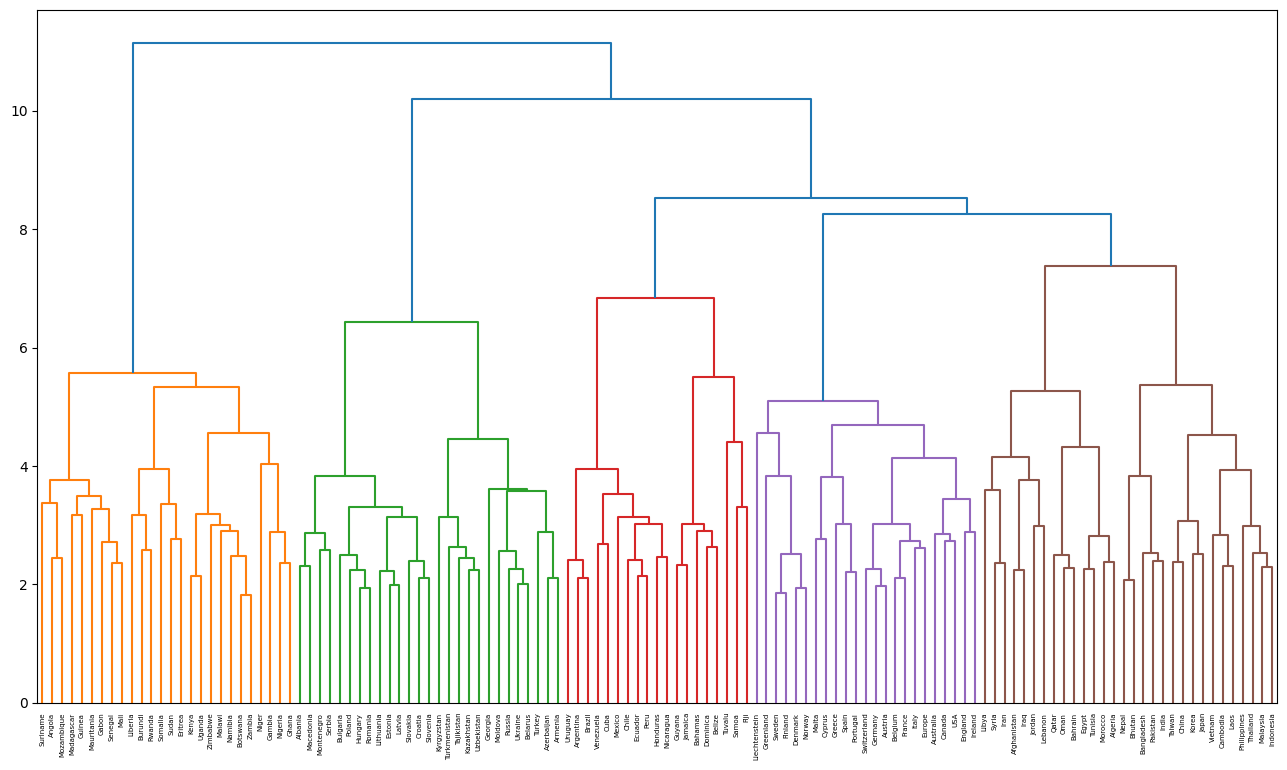

In [17]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

plt.figure(figsize=(16, 9))
Z = linkage(countries_vec, method='ward') #クラスタ間の距離
dendrogram(Z, labels=countries) #デンドログラム
plt.show()

**knock69**

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE()
tsne.fit(countries_vec)

plt.figure(figsize=(15, 15), dpi=300)
plt.scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1])
for (x, y), name in zip(tsne.embedding_, countries):
    plt.annotate(name, (x, y))
plt.show()